In [ ]:
# import libraries
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import shapely

# import network edges concept
gdf = gpd.read_file("../data/processed/workflow_steps/edges_concept.gpkg")
n = shapely.node(gdf.unary_union)
n = gpd.GeoDataFrame({"geometry": [n]}, crs = gdf.crs)
n = n.explode(index_parts=False).reset_index(drop=True)
conc_edges = n.copy()
del(gdf,n)

# import netowkr edges beta
gdf = gpd.read_file("../data/processed/workflow_steps/edges_beta.gpkg")
n = shapely.node(gdf.unary_union)
n = gpd.GeoDataFrame({"geometry": [n]}, crs = gdf.crs)
n = n.explode(index_parts=False).reset_index(drop=True)
beta_edges = n.copy()
del(gdf,n)

### OMG! finally found it (see intersection/length combi below).
# next:
# - find edges *only* in beta_edges
# - find edges *only* in concept_edges
# - check plots
# - once ok: save as 3 separate data sets

conc_edges_buffered = conc_edges.copy()
conc_edges_buffered["geometry"] = conc_edges_buffered.buffer(25)

edges_in_both = beta_edges[beta_edges.intersection(conc_edges_buffered.unary_union).length / beta_edges.length > 0.5].copy()
edges_only_beta = beta_edges.copy().drop(labels = edges_in_both.index, axis = 0)

edges_in_both = edges_in_both.reset_index(drop=True)
edges_only_beta = edges_only_beta.reset_index(drop=True)

In [ ]:
conc_edges.to_file("../data/processed/workflow_steps/edgecomp_conc.gpkg", index = False)
edges_in_both.to_file("../data/processed/workflow_steps/edgecomp_both.gpkg", index = False)
edges_only_beta.to_file("../data/processed/workflow_steps/edgecomp_beta.gpkg", index = False)

In [ ]:
## how to import AND PLOTSTYLE?

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

edges_in_both.plot(ax=ax, color = "orange", linewidth = 3, alpha = 0.5)
edges_only_beta.plot(ax=ax, color = "blue", linewidth = 3, alpha = 0.4)
conc_edges.plot(ax=ax, color = "black", linewidth = 0.5, alpha = 1)
ax.set_axis_off()

In [43]:
5 + 14 + 33 + 33 == 85

True

### Evaluating septima data
    

In [1]:
# import libraries
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import shapely

# import network edges concept
gdf = gpd.read_file("../data/processed/workflow_steps/edges_concept.gpkg")
n = shapely.node(gdf.unary_union)
n = gpd.GeoDataFrame({"geometry": [n]}, crs = gdf.crs)
n = n.explode(index_parts=False).reset_index(drop=True)
conc_edges = n.copy()
del(gdf,n)

# import network edges beta
gdf = gpd.read_file("../data/processed/workflow_steps/edges_beta.gpkg")
n = shapely.node(gdf.unary_union)
n = gpd.GeoDataFrame({"geometry": [n]}, crs = gdf.crs)
n = n.explode(index_parts=False).reset_index(drop=True)
beta_edges = n.copy()
del(gdf,n)

# import septima data (point)

# filepath_septima = homepath + "/data/processed/septima/land_landemaerke/land_landemaerke.gpkg"
filepath_septima = "../data/processed/septima/land_landemaerke/land_landemaerke.gpkg"
landemaerke = gpd.read_file(filepath_septima)

my_threshold = 250 # in meters

# which of these POIs are within threshold of which network?
li_beta = landemaerke[landemaerke.intersects(beta_edges.buffer(my_threshold).unary_union)].index
li_conc = landemaerke[landemaerke.intersects(conc_edges.buffer(my_threshold).unary_union)].index

li_onlybeta = list(set(li_beta).difference(li_conc))
li_onlyconc = list(set(li_conc).difference(li_beta))
li_inboth = list(set(li_beta).intersection(li_conc))
li_outside = list( set(landemaerke.index).difference(set(li_beta).union(set(li_conc))) )


In both: 33, only in concept: 14, only in beta: 5


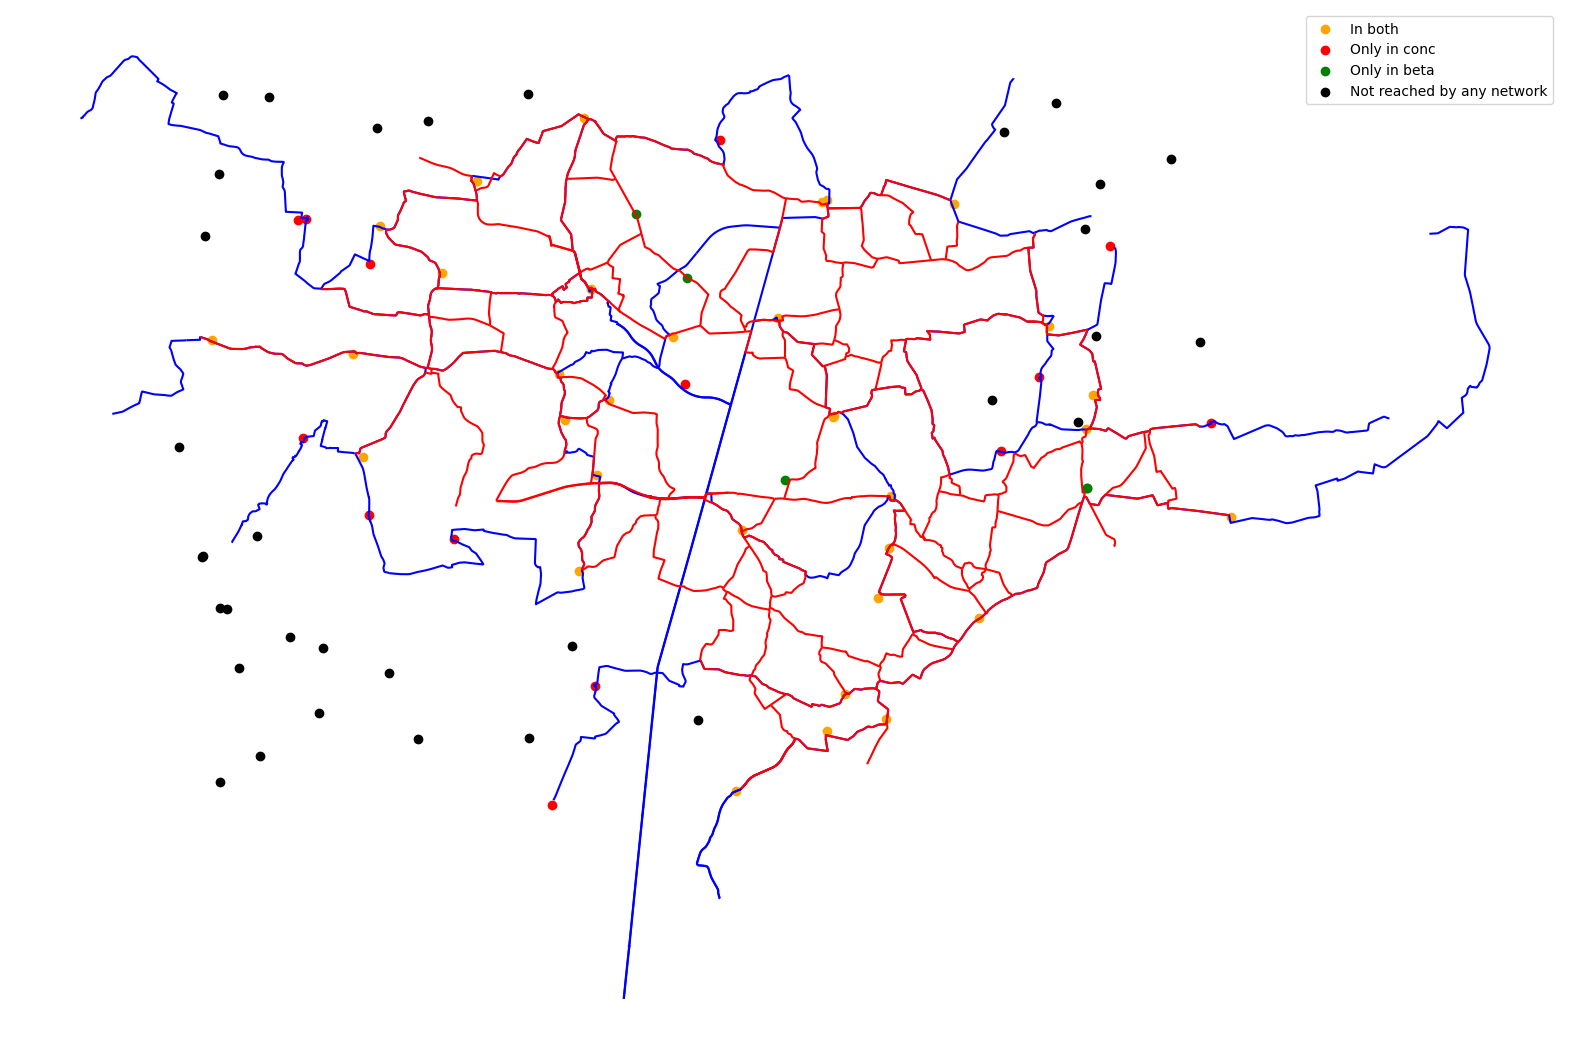

In [41]:
my_threshold = 250 # in meters

# which of these POIs are within threshold of which network?
li_beta = landemaerke[landemaerke.intersects(beta_edges.buffer(my_threshold).unary_union)].index
li_conc = landemaerke[landemaerke.intersects(conc_edges.buffer(my_threshold).unary_union)].index

li_onlybeta = list(set(li_beta).difference(li_conc))
li_onlyconc = list(set(li_conc).difference(li_beta))
li_inboth = list(set(li_beta).intersection(li_conc))
li_outside = list( set(landemaerke.index).difference(set(li_beta).union(set(li_conc))) )

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize = (20,20))

conc_edges.plot(ax=ax, color = "blue")
beta_edges.plot(ax=ax, color = "red")

landemaerke.filter(li_inboth, axis = 0).plot(ax=ax, color = "orange", label = "In both")
landemaerke.filter(li_onlyconc, axis = 0).plot(ax=ax, color = "red", label = "Only in conc")
landemaerke.filter(li_onlybeta, axis = 0).plot(ax=ax, color = "green", label = "Only in beta")
landemaerke.filter(li_outside, axis = 0).plot(ax=ax, color = "black", label = "Not reached by any network")


plt.legend()
ax.set_axis_off()
print(f"In both: {len(li_inboth)}, only in concept: {len(li_onlyconc)}, only in beta: {len(li_onlybeta)}")
plt.show()


